In [ ]:
!pip install pyportfolioopt
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# from pandas_datareader.data import DataReader
import yfinance as yf
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stocks = ["JPM", "GS", "MSFT", "WMT"]
stocks_df = yf.download(stocks, start = '2011-1-1', end = '2015-12-31')['Adj Close']
stocks_df.head()

[*********************100%***********************]  4 of 4 completed


,GS,JPM,MSFT,WMT
Date,,,,
2011-01-03,143.108826,31.665419,21.917929,41.665138
2011-01-04,143.133652,32.123699,22.004097,41.825516
2011-01-05,143.894485,32.516510,21.933596,41.550591
2011-01-06,142.414200,32.356480,22.575933,41.206963
2011-01-07,141.157104,31.745441,22.403608,41.298588


In [ ]:
fig_price = px.line(stocks_df, title='Price of Individual Stocks')
fig_price.show()

In [ ]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()

,GS,JPM,MSFT,WMT
Date,,,,
2011-01-04,0.000173,0.014473,0.003931,0.003849
2011-01-05,0.005316,0.012228,-0.003204,-0.006573
2011-01-06,-0.010287,-0.004922,0.029286,-0.008270
2011-01-07,-0.008827,-0.018885,-0.007633,0.002224
2011-01-10,-0.005449,-0.005500,-0.013287,-0.006472


In [ ]:
daily_returns.std()

GS      0.016724
JPM     0.016981
MSFT    0.014798
WMT     0.010154
dtype: float64

In [ ]:
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)
print(mu)

def plot_cum_returns(data, title):    
    daily_cum_returns = 1 + data.dropna().pct_change()
    daily_cum_returns = daily_cum_returns.cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig
    
fig_cum_returns = plot_cum_returns(stocks_df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()

corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0.02)
    ret_tangent, std_tangent, _ =   ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r",     label="Max Sharpe")
# Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
# Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()
    
plot_efficient_frontier_and_max_sharpe(mu, S)

ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)

expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()
print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

In [ ]:
corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

In [ ]:
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)
print(mu)

GS      0.023900
JPM     0.117940
MSFT    0.182899
WMT     0.051538
dtype: float64


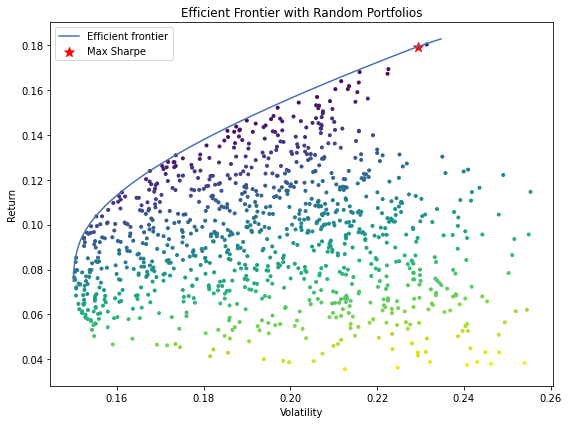

In [ ]:
def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0.02)
    ret_tangent, std_tangent, _ =   ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r",     label="Max Sharpe")
# Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
# Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()
    
plot_efficient_frontier_and_max_sharpe(mu, S)

In [ ]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)

OrderedDict([('GS', 0.0), ('JPM', 0.05437), ('MSFT', 0.94563), ('WMT', 0.0)])


In [ ]:
weights_df = pd.DataFrame.from_dict(weights, orient = 'index')
weights_df.columns = ['weights']
weights_df

,weights
GS,0.00000
JPM,0.05437
MSFT,0.94563
WMT,0.00000


In [ ]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()
print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

Expected annual return: 17.94%
Annual volatility: 22.95%
Sharpe ratio: 0.69


In [ ]:
!pip install cvxopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = True

In [ ]:
import plotly
import cufflinks
plotly.__version__

'5.5.0'

In [ ]:
# import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

In [ ]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

Text(0, 0.5, 'returns')

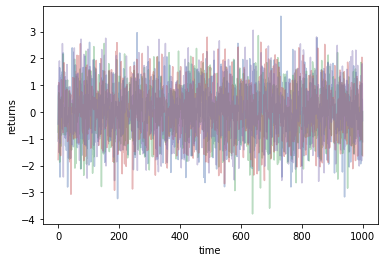

In [ ]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
# py.iplot_mpl(fig, filename='s6_damped_oscillation')

In [ ]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.31914912 0.16429232 0.28645334 0.23010522]
[0.09527824 0.12052613 0.30646258 0.47773304]


In [ ]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [ ]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

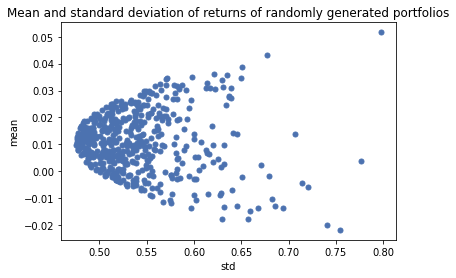

In [ ]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
# py.iplot_mpl(fig, filename='mean_std', strip_style=True)

     pcost       dcost       gap    pres   dres
 0: -5.0267e-03 -1.0500e+00  1e+00  1e-16  3e+00
 1: -7.0118e-03 -5.7796e-02  5e-02  2e-16  1e-01
 2: -2.1272e-02 -3.2067e-02  1e-02  2e-16  2e-17
 3: -2.3343e-02 -2.3817e-02  5e-04  1e-16  8e-18
 4: -2.3609e-02 -2.3614e-02  6e-06  2e-16  1e-17
 5: -2.3612e-02 -2.3612e-02  6e-08  6e-17  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5722e-03 -1.0480e+00  1e+00  2e-16  3e+00
 1: -5.5000e-03 -5.5617e-02  5e-02  1e-16  1e-01
 2: -1.8307e-02 -2.8145e-02  1e-02  3e-17  2e-17
 3: -2.0236e-02 -2.0675e-02  4e-04  1e-16  2e-17
 4: -2.0527e-02 -2.0533e-02  6e-06  1e-16  6e-18
 5: -2.0532e-02 -2.0532e-02  6e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9432e-03 -1.0458e+00  1e+00  2e-16  3e+00
 1: -3.8092e-03 -5.3194e-02  5e-02  1e-16  1e-01
 2: -1.5246e-02 -2.4104e-02  9e-03  4e-17  2e-17
 3: -1.7023e-02 -1.7502e-02  5e-04  1e-16  1e-17
 4: -1.7346e-02 -1.7354e

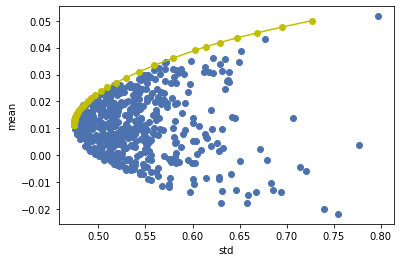

In [ ]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
# py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [ ]:
print(weights)

[[2.77880107e-09]
 [3.20322848e-06]
 [1.54301198e-06]
 [9.99995251e-01]]


In [ ]:
!pip install zipline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 31.5 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 
     |████████████████████████████████| 11.3 MB 68.4 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 11.3 MB 17.5 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 11.3 MB 62.6 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 10.4 MB 58.7 MB/s 
     |████████████████████████████████| 107 kB 69.5 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 108 kB 51.4 MB/s 
     |████████████████████████████████| 209 kB 45.7 MB/s 
     |████████████████████████████████| 1.5 MB 71.1 MB/s 
     |████████████████████████████████| 355 kB 52.3 MB/s 
     |████████████████████████████████| 1.3 MB 68.9 MB/s 
     |███████████████

In [ ]:
from zipline.utils.factory import load_bars_from_yahoo
end = pd.Timestamp.utcnow()
start = end - 2500 * pd.tseries.offsets.BDay()

data = load_bars_from_yahoo(stocks=['IBM', 'GLD', 'XOM', 'AAPL', 
                                    'MSFT', 'TLT', 'SHY'],
                            start=start, end=end)

ModuleNotFoundError: ignored